# Syrtis Demonstration - Habitat Evaluation
# Evaluating the Performance of Various Hypothetical Habitats

In [1]:
from syrtis import *
from syrtis.configuration import Configuration
from syrtis.solver import Solver
from syrtis.material import Solid, ConstrainedIdealGas
from syrtis.habitat import Habitat
import numpy as np
import matplotlib.pyplot as plt

### Setup and Configuration
The syrtis modules are imported. A range of solid materials used (aluminium, steel, a generic plastic and open-cell foam) and a range of gases are created. 

The baseline Configuration is created - later, ConfigurationManagers will be used to iterate through a range of habitat temperatures (`T_hab`) to obtain a performance chart.

In [2]:
# Materials definitions
# The absorbivity of perlite and air are assumed as 0.5 but are not required
aluminium = Solid("Aluminium", 247, 2700, 900, absorb=0.15, emit=0.04)
steel = Solid("Dull stainless steel", 45, 7800, 420, absorb=0.50, emit=0.21)
plastic = Solid("Generic plastic", 10, 1300, 1420, absorb=0.89, emit=0.84)
open_cell_foam = Solid("Generic open-cell polyurethane foam", 0.036, 10, 1500, 0.5)

internal_air = ConstrainedIdealGas("STP Air", 101325, 29, 0.71, 17.9e-6, 1010, 0.0252)
martian_air = ConstrainedIdealGas("Martian ambient pressure CO2", 580, 44, 0.71, 10.9e-6, 749, 0.0153)
martian_air_30kpa = ConstrainedIdealGas("CO2, 30kPa", 30e3, 44, 0.71, 10.9e-6, 749, 0.0153)

mount_sharp = Configuration("Curiosity landing area, Mount Sharp",
 "constant temperature", 210, 0.2, 0.29, 210, 580, 5, "cross", 90, 90, 590, T_habitat=293)

## Mars Direct-style Habitat

In [3]:
mars_direct_hab = Habitat(orientation="vertical", length=8, endcap_type="flat")

mars_direct_hab.create_static_shell(internal_air, 4.400)
mars_direct_hab.create_static_shell(aluminium, 4.8e-3)

mars_direct_hab.create_static_shell(martian_air, 50e-3, parallel_thermal_resistance=8.5e-5)
# Parallel resistance corresponds to 1% of the cross-section being aluminium

mars_direct_hab.create_static_shell(plastic, 12e-3)
mars_direct_hab.create_static_shell(martian_air, 50e-3, parallel_thermal_resistance=8.4e-5)

mars_direct_hab.create_static_shell(aluminium, 2e-3)

mars_direct_hab.create_ground_level(thermal_resistance=1)
# Thermal resistance roughly corresponds to six aluminium landing legs, each 5m long and with 50cm2 area

mars_direct_hab.verify_geometry()
print("Diameter of habitat: {:2f}m".format(2*mars_direct_hab.radius_outer))

Diameter of habitat: 9.037600m


## Horizontal Habitat (6m module)

With and without a plastic tent filled to 30kPa, 1m gap between outer pressure wall and tent

In [4]:
mod_6m = Habitat(orientation="horizontal", length=18, endcap_type="hemisphere")

# Wall thickness based on TransHab
mod_6m.create_static_shell(internal_air, 2.96)
mod_6m.create_static_shell(plastic, 2e-3)
mod_6m.create_static_shell(open_cell_foam, 50e-3)
mod_6m.create_static_shell(plastic, 2e-3)

mod_6m.create_ground_level(habitat_axis_height=2)
mod_6m.verify_geometry()
print("Diameter of habitat: {:2f}m".format(2*mod_6m.radius_outer))

Diameter of habitat: 6.028000m


In [5]:
mod_6m_tent = Habitat(orientation="horizontal", length=18, endcap_type="hemisphere")

# Wall thickness based on TransHab
mod_6m_tent.create_static_shell(internal_air, 2.97)
mod_6m_tent.create_static_shell(plastic, 2e-3)
mod_6m_tent.create_static_shell(open_cell_foam, 50e-3)
mod_6m_tent.create_static_shell(plastic, 2e-3)
mod_6m_tent.create_static_shell(martian_air_30kpa, 1)
mod_6m_tent.create_static_shell(plastic, 2e-3)


mod_6m_tent.create_ground_level(habitat_axis_height=3)
mod_6m_tent.verify_geometry()
print("Diameter of habitat: {:2f}m".format(2*mod_6m_tent.radius_outer))

Diameter of habitat: 8.052000m


In [6]:
mod_6m_tent_2 = Habitat(orientation="horizontal", length=18, endcap_type="hemisphere")

# Wall thickness based on TransHab
mod_6m_tent_2.create_static_shell(internal_air, 2.97)
mod_6m_tent_2.create_static_shell(plastic, 2e-3)
mod_6m_tent_2.create_static_shell(open_cell_foam, 50e-3)
mod_6m_tent_2.create_static_shell(plastic, 2e-3)
mod_6m_tent_2.create_static_shell(martian_air_30kpa, 6, thermal_resistance=3.9e-4)
mod_6m_tent_2.create_static_shell(plastic, 2e-3)
mod_6m_tent_2.create_static_shell(aluminium, 0.5e-3)


mod_6m_tent_2.create_ground_level(habitat_axis_height=9)
mod_6m_tent_2.verify_geometry()
print("Diameter of habitat: {:2f}m".format(2*mod_6m_tent_2.radius_outer))

Diameter of habitat: 18.053000m


In [7]:
mod_6m_tent_2b = Habitat(orientation="horizontal", length=18, endcap_type="hemisphere")

# Wall thickness based on TransHab
mod_6m_tent_2b.create_static_shell(internal_air, 2.97)
mod_6m_tent_2b.create_static_shell(plastic, 2e-3)
mod_6m_tent_2b.create_static_shell(open_cell_foam, 50e-3)
mod_6m_tent_2b.create_static_shell(plastic, 2e-3)
mod_6m_tent_2b.create_static_shell(martian_air_30kpa, 6, thermal_resistance=3.9e-4)
mod_6m_tent_2b.create_static_shell(plastic, 2e-3)


mod_6m_tent_2b.create_ground_level(habitat_axis_height=9)
mod_6m_tent_2b.verify_geometry()
print("Diameter of habitat: {:2f}m".format(2*mod_6m_tent_2b.radius_outer))

Diameter of habitat: 18.052000m


Diameter of habitat: 18.053000m


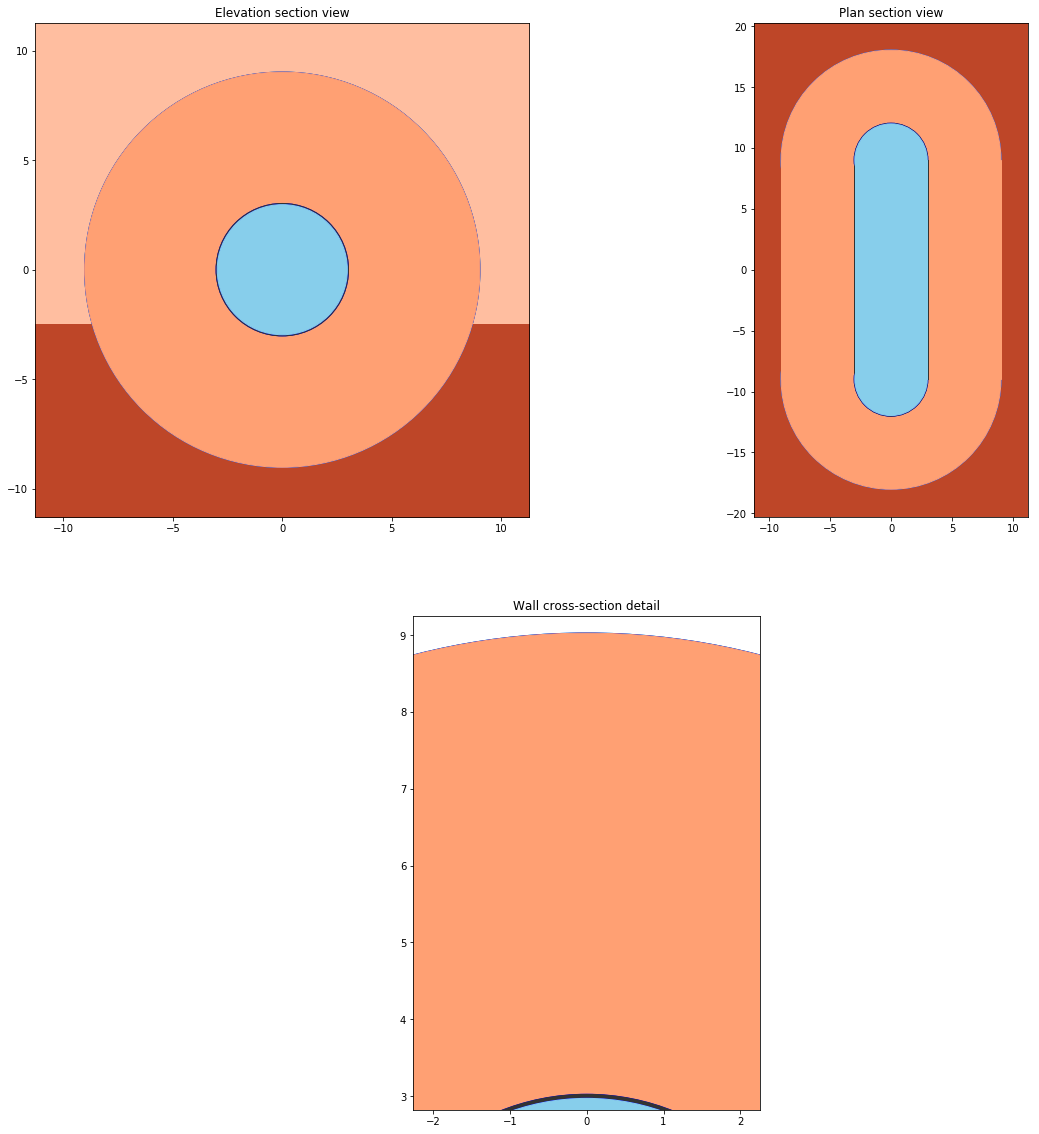

In [8]:
mod_6m_tent_2c = Habitat(orientation="horizontal", length=18, endcap_type="hemisphere")

# Wall thickness based on TransHab
mod_6m_tent_2c.create_static_shell(internal_air, 2.97)
mod_6m_tent_2c.create_static_shell(plastic, 2e-3)
mod_6m_tent_2c.create_static_shell(open_cell_foam, 50e-3)
mod_6m_tent_2c.create_static_shell(plastic, 2e-3)
mod_6m_tent_2c.create_static_shell(martian_air_30kpa, 6)
mod_6m_tent_2c.create_static_shell(plastic, 2e-3)
mod_6m_tent_2c.create_static_shell(aluminium, 0.5e-3)


mod_6m_tent_2c.create_ground_level(habitat_axis_height=2.5)
mod_6m_tent_2c.verify_geometry()
print("Diameter of habitat: {:2f}m".format(2*mod_6m_tent_2c.radius_outer))
mod_6m_tent_2c.draw()

## Execution

Configurations for both the vertical and horizontal cases are created and executed

In [9]:
mars_direct_hab_summer = DayManager(mars_direct_hab, mount_sharp, 24, 
    atmosphere_tau=0.3, latitude=-4.6, areocentric_longitude=270,
    T_air_max=270, T_air_min=195, T_ground_max=298, T_ground_min=170, time_air_peak=15.3, time_ground_peak=12.2)

mod_6m_summer = DayManager(mod_6m, mount_sharp, 24, 
    atmosphere_tau=0.3, latitude=-4.6, areocentric_longitude=270,
    T_air_max=270, T_air_min=195, T_ground_max=298, T_ground_min=170, time_air_peak=15.3, time_ground_peak=12.2)

mod_6m_tent_summer = DayManager(mod_6m_tent, mount_sharp, 24, 
    atmosphere_tau=0.3, latitude=-4.6, areocentric_longitude=270,
    T_air_max=270, T_air_min=195, T_ground_max=298, T_ground_min=170, time_air_peak=15.3, time_ground_peak=12.2)

mod_6m_tent_2_summer = DayManager(mod_6m_tent_2, mount_sharp, 24, 
    atmosphere_tau=0.3, latitude=-4.6, areocentric_longitude=270,
    T_air_max=270, T_air_min=195, T_ground_max=298, T_ground_min=170, time_air_peak=15.3, time_ground_peak=12.2)

mod_6m_tent_2b_summer = DayManager(mod_6m_tent_2b, mount_sharp, 24, 
    atmosphere_tau=0.3, latitude=-4.6, areocentric_longitude=270,
    T_air_max=270, T_air_min=195, T_ground_max=298, T_ground_min=170, time_air_peak=15.3, time_ground_peak=12.2)

mod_6m_tent_2c_summer = DayManager(mod_6m_tent_2c, mount_sharp, 24, 
    atmosphere_tau=0.3, latitude=-4.6, areocentric_longitude=270,
    T_air_max=270, T_air_min=195, T_ground_max=298, T_ground_min=170, time_air_peak=15.3, time_ground_peak=12.2)

In [10]:
MDH_S_config, MDH_S_heats, MDH_S_reports = mars_direct_hab_summer.run_all_configurations(verbose=True)

In [11]:
mod_6m_config, mod_6m_heats, mod_6m_reports = mod_6m_summer.run_all_configurations(verbose=True)

In [12]:
mod_6m_tent_config, mod_6m_tent_heats, mod_6m_tent_reports = mod_6m_tent_summer.run_all_configurations(verbose=True)

In [13]:
mod_6m_tent_2_config, mod_6m_tent_2_heats, mod_6m_tent_2_reports = mod_6m_tent_2_summer.run_all_configurations(verbose=True)

In [14]:
mod_6m_tent_2b_config, mod_6m_tent_2b_heats, mod_6m_tent_2b_reports = mod_6m_tent_2b_summer.run_all_configurations(verbose=True)

In [15]:
mod_6m_tent_2c_config, mod_6m_tent_2c_heats, mod_6m_tent_2c_reports = mod_6m_tent_2c_summer.run_all_configurations(verbose=True)

Text(0.5, 1.0, 'Daily variation in heat loss from Mars Direct habitat, summer')

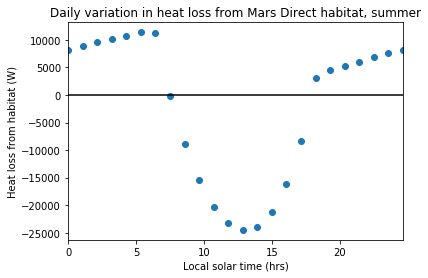

In [16]:
plt.figure(figsize=(6,4))

plt.scatter(mars_direct_hab_summer.times, MDH_S_heats)

plt.axhline(0, color='black')
plt.xlim(0, 24.65)

plt.xlabel("Local solar time (hrs)")
plt.ylabel("Heat loss from habitat (W)")
plt.title("Daily variation in heat loss from Mars Direct habitat, summer")

Text(0.5, 1.0, 'Daily variation in heat loss from 6m module, summer')

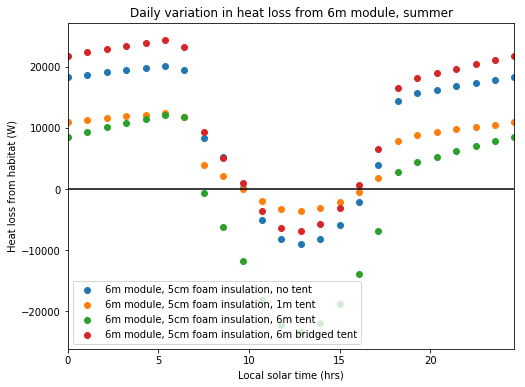

In [17]:
plt.figure(figsize=(8,6))

plt.scatter(mod_6m_summer.times, mod_6m_heats, label="6m module, 5cm foam insulation, no tent")
plt.scatter(mod_6m_summer.times, mod_6m_tent_heats, label="6m module, 5cm foam insulation, 1m tent")
plt.scatter(mod_6m_summer.times, mod_6m_tent_2_heats, label="6m module, 5cm foam insulation, 6m tent")
plt.scatter(mod_6m_summer.times, mod_6m_tent_2b_heats, label="6m module, 5cm foam insulation, 6m bridged tent")

plt.legend()
plt.axhline(0, color='black')
plt.xlim(0, 24.65)

plt.xlabel("Local solar time (hrs)")
plt.ylabel("Heat loss from habitat (W)")
plt.title("Daily variation in heat loss from 6m module, summer")

Text(0.5, 1.0, 'Daily variation in heat loss from 6m module, summer')

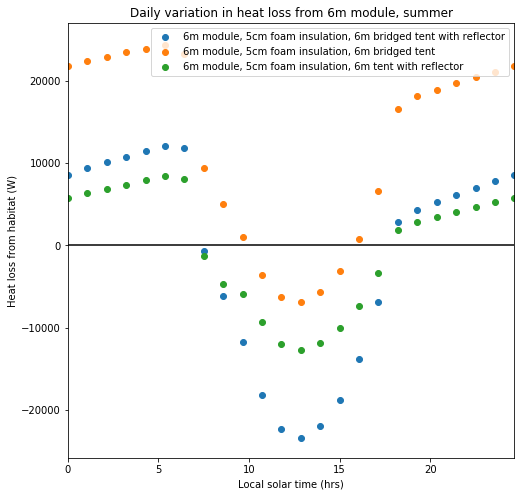

In [18]:
plt.figure(figsize=(8,8))

plt.scatter(mod_6m_summer.times, mod_6m_tent_2_heats, label="6m module, 5cm foam insulation, 6m bridged tent with reflector")
plt.scatter(mod_6m_summer.times, mod_6m_tent_2b_heats, label="6m module, 5cm foam insulation, 6m bridged tent")
plt.scatter(mod_6m_summer.times, mod_6m_tent_2c_heats, label="6m module, 5cm foam insulation, 6m tent with reflector")


plt.legend()
plt.axhline(0, color='black')
plt.xlim(0, 24.65)

plt.xlabel("Local solar time (hrs)")
plt.ylabel("Heat loss from habitat (W)")
plt.title("Daily variation in heat loss from 6m module, summer")

# Analyse a combined geometry

Suppose a toggleable thermal bridge, which turns off heat pipes whenever doing so would reduce heat loss. This can be approximated by switching between the two cases above

In [19]:
switching_heats = []
for time in range(len(mod_6m_summer.times)):
    switching_heats.append(min(mod_6m_tent_2_heats[time], mod_6m_tent_2b_heats[time], mod_6m_tent_2c_heats[time])) 

Text(0.5, 1.0, 'Daily variation in heat loss from 6m module, summer')

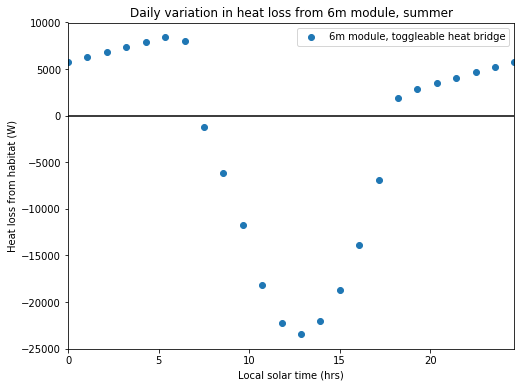

In [20]:
plt.figure(figsize=(8,6))

plt.scatter(mod_6m_summer.times, switching_heats, label="6m module, toggleable heat bridge")


plt.legend()
plt.axhline(0, color='black')
plt.xlim(0, 24.65)

plt.xlabel("Local solar time (hrs)")
plt.ylabel("Heat loss from habitat (W)")
plt.title("Daily variation in heat loss from 6m module, summer")

In [21]:
print(sum(mod_6m_tent_2_heats))
print(sum(mod_6m_tent_2b_heats))
print(sum(mod_6m_tent_2c_heats))
print(sum(switching_heats))

-27950.576346205424
295672.5567839681
-22.72560062364937
-66168.55367913686


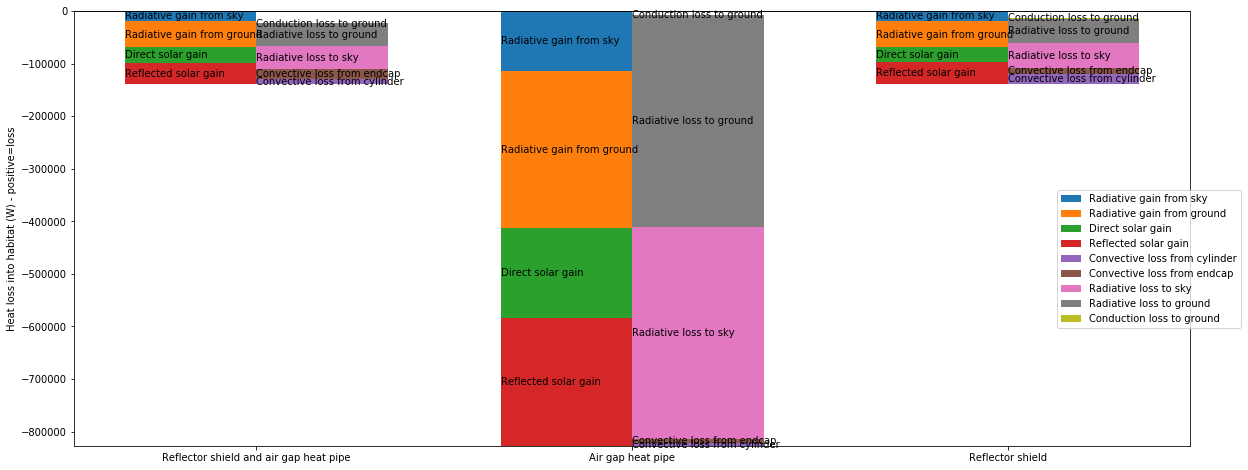

In [22]:
plt.figure(figsize=(20,8))
tools.plot_power_balance([mod_6m_tent_2_reports[12], mod_6m_tent_2b_reports[12], mod_6m_tent_2c_reports[12]], 
    labels=["Reflector shield and air gap heat pipe", "Air gap heat pipe", "Reflector shield"])